<a href="https://colab.research.google.com/github/komzy/spark-ml-course/blob/main/week-2/Session_4_edited.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Session 4: Machine Learning with Koalas and Spark

Most of the data scientists or machine learning engineers start with Pandas and Numpy before moving to other libraries. No once can debate around the use of Pandas as a standard data processing library. There are a lot of benefits of using Pandas however one key bottleneck of Pandas API to adapt with distributed processing. Solutions like Modin and Dask solve this problem to some extent. 


When it comes to using distributed processing frameworks, Spark is the de-facto choice for professionals and large data processing hubs. Recently, Databricks's team open-sourced a library called [Koalas](https://koalas.readthedocs.io/en/latest/?badge=latest) to implemented the Pandas API with spark backend. This library is under active development and covering more than 60% of Pandas API. To read more about using Koalas, refer to my earlier article [Spark-ifying Pandas: Databrick’s Koalas with Google Colab](https://medium.com/analytics-vidhya/spark-ifying-pandas-databricks-koalas-with-google-colab-93028890db5).

In this tutorial, I will walk you through to perform exploratory data analysis using Koalas and PySpark to build a regression model using the Spark distributed framework. There are a lot of benefits of using Koalas instead of Pandas API when dealing with large datasets. Some of the key points are

1. Big data processing made easy
2. Quick transformation from Pandas to Koalas
3. Integration with PySpark is seamless

The objective of this tutorial is to leverage the Spark backend for a complete machine learning development cycle using Koalas. The working google collaboratory will be embedded.


In [2]:
!pip install plotly==4.14.3

In [3]:
# Run below commands
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://apache.osuosl.org/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz
!tar xf spark-3.1.1-bin-hadoop3.2.tgz
!pip install -q findspark

! pip install koalas
!pip install loguru 

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"

import findspark
findspark.init()

from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").getOrCreate()
# Test the spark 
df = spark.createDataFrame([{"hello": "world"} for x in range(1000)])

df.show(3, False)


     |████████████████████████████████| 1.4MB 18.3MB/s 
     |████████████████████████████████| 61kB 5.8MB/s 
+-----+
|hello|
+-----+
|world|
|world|
|world|
+-----+
only showing top 3 rows



In [4]:
from loguru import logger
logger.add("Getting_Started_Koalas_{time}.log")
import plotly 
logger.info(f'plotly_version{plotly.__version__}')


2021-04-24 21:12:13.026 | INFO     | __main__:<module>:4 - plotly_version4.14.3


In [5]:
# Install compatible version of pyarrow (Only run if needed)
! pip install pyarrow

In [6]:
import seaborn as sns
import databricks.koalas as ks
ks.set_option('compute.ops_on_diff_frames', True)

## Exploratory Data Analysis using Koalas

As a first step, I want to explore the given data, its distribution, and dependency using Koalas API. I will include a simple example to demonstrate the idea, users can extend it for the problem in-hand.


In [7]:
#!wget -q 'https://raw.githubusercontent.com/amjadraza/blogs-data/master/spark_ml/ccpp.csv'
#kdf_ccpp = ks.read_csv("ccpp.csv")
#kdf_ccpp.isnull().sum()

Read the data using Koalas `read_csv` method. To read more about the API follow the [Koalas official documentation](https://koalas.readthedocs.io/en/latest/?badge=latest) 

In [8]:
# Read the dailyprices of stocks
kdf_stocks = ks.read_csv("dailyPrices_AtClose.csv")
kdf_stocks.columns

Index(['t()', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30',
       'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40',
       'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50',
       'X51', 'X52', 'X53', 'X54', 'X55', 'X56'],
      dtype='object')

In [9]:
# Read the dailyprices of stocks
kdf_X1 = ks.read_csv("X1Signals_AtClose.csv")
kdf_X1.columns

Index(['t()', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30',
       'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40',
       'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50',
       'X51', 'X52', 'X53', 'X54', 'X55', 'X56'],
      dtype='object')

In [10]:
kdf_X2 = ks.read_csv("X2Signals_AtClose.csv")
kdf_X2.columns

Index(['t()', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30',
       'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40',
       'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50',
       'X51', 'X52', 'X53', 'X54', 'X55', 'X56'],
      dtype='object')

In [11]:
print(kdf_stocks.shape)
print(kdf_X1.shape)
print(kdf_X2.shape)

(2771, 57)
(2769, 57)
(2769, 57)


In [ ]:
print(kdf_stocks.isnull().sum())

In [ ]:
#print(kdf_X1.isnull().sum())
#print(kdf_X2.isnull().sum())

In [ ]:
rolling_avg=kdf_stocks.rolling(window=50).mean()
fig =ks.concat([kdf_stocks["X3"], rolling_avg["X3"].rename("X3_rollavg")],axis=1)
fig.plot.line()



In [ ]:
kdf_X1.plot.line(y='X3',x='t()')

In [ ]:
kdf_X2.plot.line(y='X3',x='t()') 

In [ ]:
kdf_stocks.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56
count,978.000000,1009.000000,2769.000000,2347.000000,2769.000000,2769.000000,2769.000000,2769.000000,2769.000000,1935.000000,2769.000000,1884.000000,2769.000000,2769.000000,2769.000000,2122.000000,2769.000000,2431.000000,2769.000000,2769.000000,2769.000000,2769.000000,2769.000000,126.000000,2769.000000,11.000000,702.000000,2769.000000,2769.000000,2769.000000,1764.000000,2769.000000,1735.000000,2769.000000,2075.000000,2769.000000,2769.000000,1297.000000,1297.000000,2769.000000,1964.000000,989.000000,2032.000000,2769.000000,2769.000000,2199.00000,2769.000000,1887.000000,2769.000000,2769.000000,2655.000000,2769.000000,2769.000000,2769.000000,799.000000,947.000000
mean,47.372009,47.450240,30.002073,48.726673,47.053587,22.536786,22.704316,31.499365,17.299387,40.368427,12.002734,44.797423,32.037971,39.436003,22.890590,40.331420,13.316063,23.155314,55.472304,43.965033,45.867734,28.336951,28.336951,73.013616,26.810974,40.081818,55.509527,49.608361,49.608361,19.031271,33.781686,28.336951,66.403561,44.149647,25.150694,42.570695,22.274480,23.025571,29.886208,60.411647,59.431235,43.879970,51.924259,15.509881,99.659112,23.14297,61.415186,13.719651,39.158257,43.194567,47.825363,21.729495,20.702823,37.180291,30.190476,55.320209
std,7.289463,8.966514,8.430849,13.129556,24.971548,7.564017,13.011221,7.814852,5.375074,19.318590,5.636116,10.611501,11.966890,39.467422,16.524645,10.674470,7.589846,9.079866,23.347842,20.831593,10.425307,5.828690,5.828690,2.657287,8.764617,0.480725,11.867864,22.960526,22.960526,6.528773,15.962153,5.828690,19.858817,18.169971,16.596867,37.623522,13.323339,4.098243,5.102741,16.616182,19.685829,10.330355,13.046440,9.905678,82.428309,6.60741,27.900160,3.200755,33.082999,15.077705,20.886531,4.407773,10.421623,8.969457,11.179699,9.897227
min,37.420900,32.487100,12.829485,12.812022,18.617020,10.760470,4.514504,20.082495,6.499510,9.900310,4.136301,12.780717,16.243363,1.725600,5.645000,25.791426,5.431894,8.928470,25.882919,15.100206,28.934400,17.342642,17.342642,67.586300,14.679925,39.390000,39.803807,19.985341,19.985341,9.064970,12.982711,17.342642,23.129637,22.891171,2.094400,2.094400,7.792755,14.683300,15.921500,37.240288,23.445655,26.020000,30.014600,5.261226,18.330000,5.60000,26.697122,6.213900,10.669763,22.883581,18.150000,14.053334,4.051097,18.972700,14.310000,41.454600
25%,42.585600,38.904800,24.486062,41.314827,28.260969,17.251622,11.810788,26.715576,14.274098,28.716419,7.802844,36.510456,21.870881,6.635300,10.900000,32.423715,7.625087,17.782361,38.602482,26.321390,38.142891,24.041843,24.041843,70.760241,18.481911,39.610000,49.464430,29.223442,29.223442,13.895530,19.735375,24.041843,52.735648,29.128993,15.350000,17.140000,12.011747,20.256500,26.609700,48.464870,37.903750,34.620000,43.711500,8.519073,34.050000,18.76000,35.749134,11.940200,19.254971,35.164908,27.500000,18.585555,14.302456,30.073700,19.070000,49.387800
50%,45.927700,49.052800,28.004784,50.469156,33.789427,19.588871,16.928472,29.331267,17.036596,35.464466,9.892882,48.084472,29.770658,24.444200,14.840000,37.912502,9.452205,20.471341,44.965271,38.890789,43.485009,26.467653,26.467653,72.811541,24.148975,40.000000,53.082174,42.503961,42.503961,16.933384,31.804800,26.467653,69.049805,34.756538,19.765000,23.595000,15.903617,22.295200,29.847900,55.458206,65.551400,43.520000,50.352200,10.574250,66.650000,23.43000,53.007062,13.595700,24.076123,39.288871,47.580000,19.866853,16.565938,36.355700,30.410000,52.195700
75%,49.187600,52.720800,34.448216,56.294887,65.451877,28.506444,33.553690,38.054424,21.360561,46.165956,17.710602,53.085033,43.668061,65.171500,32.175000,47.109132,18.612534,27.016384,80.861065,61.292893,55.666776,32.284616,32.284616,74.979088,35.288403,40.490000,57.704899,67.771101,67.771101,23.755269,41.750011,32.284616,79.728645,62.923979,3

In [ ]:

#dummy_data = {kdf_stocks['X1'],kdf_X1['X1']}

# data= {kdf_stocks.loc[:, ['t()', 'X1']], kdf_X1.loc[:, ['t()', 'X1']] }
# print(data.columns)
# print(data.shape)

dd= kdf_X1.X3.rename("X3_X1signal")
ddd=kdf_X2.X3.rename("X3_X2signal")
df4 =ks.concat([kdf_stocks["X3"], dd, ddd],axis=1)
df4.shape


(2771, 3)

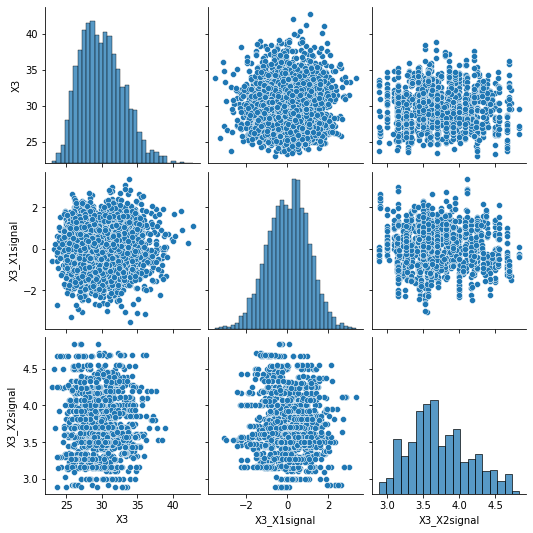

In [ ]:
sns.pairplot(df4.rolling(window=10).mean().to_pandas())

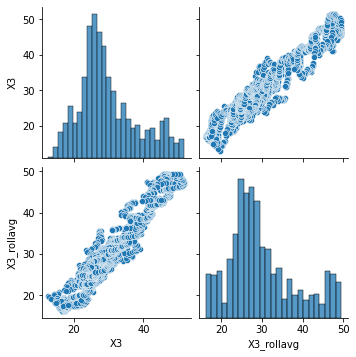

In [ ]:
sns.pairplot(fig.to_pandas())
#type(fig)

#HIGH CORRELATION BETWEEN FUTURE VALUES AND PAST VALUES

In [ ]:
kdf_stocks_X33=kdf_stocks.loc[:, ['t()', 'X3']]
kdf_stocks_X33.sort_values(by=['t()']).head()

,t(),X3
0,2005-01-03,17.521205
1,2005-01-04,17.329738
2,2005-01-05,17.034457
3,2005-01-06,17.385526
4,2005-01-07,17.425426


In [47]:
kdf_stocks_X3=kdf_stocks.loc[:, ['t()', 'X3']]
#kdf_stocks_X3.plot.line(y='X1',x='t()')

print(kdf_stocks_X3.shape)

kdf_stocks_X3=ks.concat([kdf_stocks_X3,
                         kdf_stocks_X3.X3.shift().rename("1"),
                         kdf_stocks_X3.X3.shift(2).rename("2"),
                         kdf_stocks_X3.X3.shift(3).rename("3"),
                         kdf_stocks_X3.X3.shift(4).rename("4"),
                         kdf_stocks_X3.X3.shift(5).rename("5"),                         
                         kdf_stocks_X3.X3.shift(6).rename("6"),
                         kdf_stocks_X3.X3.shift(7).rename("7"),                       
                         kdf_stocks_X3.X3.shift(8).rename("8"), 
                         kdf_stocks_X3.X3.shift(9).rename("9"), 
                         kdf_stocks_X3.X3.shift(10).rename("10")],axis=1).sort_values(by=['t()'])                                   

kdf_stocks_X3=kdf_stocks_X3.iloc[10:]  #remove the first 9 rows that have NAN
#kdf_stocks_X3=kdf_stocks_X3.set_index('t()') 

#kdf_stocks_X3.head()
print(kdf_stocks_X3.shape)
#kdf_stocks_X3.plot.line()


(2771, 2)
(2761, 12)


## Model Building using PySpark

Once the EDA and Feature engineering done, it is time to build the predictive model. One of the benefits of using the Koalas dataframe is that users can create a Spark dataframe seamlessly. In the below section, I demonstrate the use of PySpark API to build and train Gradient Boosting Machines (GBM).

In [ ]:
# Create the moving average features
#kdf = kdf_ccpp.rolling(window=20, min_periods=1).mean()

In [48]:
# Convert the Koalas DataFrame into Spark DataFrame
sdf = kdf_stocks_X3.to_spark()

In [49]:
sdf.show(5,False)

+----------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
|t()       |X3       |1        |2        |3        |4        |5        |6        |7        |8        |9        |10       |
+----------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
|2005-01-18|18.502554|17.481305|17.433461|17.210037|17.321703|17.569049|17.425426|17.385526|17.034457|17.329738|17.521205|
|2005-01-19|18.598334|18.502554|17.481305|17.433461|17.210037|17.321703|17.569049|17.425426|17.385526|17.034457|17.329738|
|2005-01-20|18.614312|18.598334|18.502554|17.481305|17.433461|17.210037|17.321703|17.569049|17.425426|17.385526|17.034457|
|2005-01-21|18.07972 |18.614312|18.598334|18.502554|17.481305|17.433461|17.210037|17.321703|17.569049|17.425426|17.385526|
|2005-01-24|18.223343|18.07972 |18.614312|18.598334|18.502554|17.481305|17.433461|17.210037|17.321703|17.569049|17.425426|
+----------+----

Now, build the model using PySpark API. For moe details on building models using PySpark refer to my article [Machine Learning With Spark](https://towardsdatascience.com/machine-learning-with-spark-f1dbc1363986).

In [50]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.regression import GBTRegressor

Prepare the features comaptible with PySpark models

In [ ]:
# Create the feature column using VectorAssembler class
vectorAssembler = VectorAssembler(inputCols =["AT", "V", "AP", "RH"], outputCol = "features")
vpp_sdf = vectorAssembler.transform(sdf)

In [ ]:
vpp_sdf.show(2, False)

+-----+-----+--------+------+-------+-----------------------------+
|AT   |V    |AP      |RH    |PE     |features                     |
+-----+-----+--------+------+-------+-----------------------------+
|14.96|41.76|1024.07 |73.17 |463.26 |[14.96,41.76,1024.07,73.17]  |
|20.07|52.36|1022.055|66.125|453.815|[20.07,52.36,1022.055,66.125]|
+-----+-----+--------+------+-------+-----------------------------+
only showing top 2 rows



Create the tarin and test splits

In [ ]:
# Define train and test data split
splits = vpp_sdf.randomSplit([0.7,0.3])
train_df = splits[0]
test_df = splits[1]

In [ ]:
train_df.show(5,False)

+------------------+------------------+------------------+-----------------+------------------+-----------------------------------------------------------------+
|AT                |V                 |AP                |RH               |PE                |features                                                         |
+------------------+------------------+------------------+-----------------+------------------+-----------------------------------------------------------------+
|12.960999999999999|45.290000000000006|1013.3865000000002|83.168           |470.3364999999999 |[12.960999999999999,45.290000000000006,1013.3865000000002,83.168]|
|13.123999999999999|46.34             |1013.427          |83.153           |469.3954999999999 |[13.123999999999999,46.34,1013.427,83.153]                       |
|13.366999999999999|46.231500000000004|1012.7280000000001|81.884           |469.2805          |[13.366999999999999,46.231500000000004,1012.7280000000001,81.884]|
|14.081500000000002|46.711  

Build and train the model

In [ ]:
# Define the GBT Model
gbt = GBTRegressor(featuresCol="features", labelCol="PE")
gbt_model = gbt.fit(train_df)
gbt_predictions = gbt_model.transform(test_df)

In [ ]:
gbt_predictions.printSchema()

root
 |-- AT: double (nullable = true)
 |-- V: double (nullable = true)
 |-- AP: double (nullable = true)
 |-- RH: double (nullable = true)
 |-- PE: double (nullable = true)
 |-- features: vector (nullable = true)
 |-- prediction: double (nullable = false)



In [ ]:
gbt_predictions.show()

+------------------+------------------+------------------+-----------------+------------------+--------------------+------------------+
|                AT|                 V|                AP|               RH|                PE|            features|        prediction|
+------------------+------------------+------------------+-----------------+------------------+--------------------+------------------+
|           14.5665|           48.1455|         1013.3585|          79.4805|          466.1535|[14.5665,48.1455,...| 464.4911118202789|
|           14.8475|49.352000000000004|1013.4995000000001|          78.4715| 465.1094999999999|[14.8475,49.35200...|462.10907059557854|
|           14.9285|            48.765|1015.2425000000001|81.76849999999999|464.33449999999993|[14.9285,48.765,1...| 462.8718971840444|
|             14.96|             41.76|           1024.07|            73.17|            463.26|[14.96,41.76,1024...| 463.3502267441246|
|             15.01|49.071999999999996|1014.2400

Evaluate the model accuracy

In [ ]:
# Evaluate the GBT Model
gbt_evaluator = RegressionEvaluator(labelCol="PE", predictionCol="prediction", metricName="rmse")
gbt_rmse = gbt_evaluator.evaluate(gbt_predictions)
print("The RMSE of GBT Tree regression Model is {}".format(gbt_rmse))

The RMSE of GBT Tree regression Model is 1.0675093276499747


Converting prediction back to Koalas DataFrame

In [ ]:
kdf_predictions = ks.DataFrame(gbt_predictions)

In [ ]:
kdf_predictions.head()

,AT,V,AP,RH,PE,features,prediction
0,14.5665,48.1455,1013.3585,79.4805,466.1535,"[14.5665, 48.1455, 1013.3585, 79.4805]",464.491112
1,14.8475,49.3520,1013.4995,78.4715,465.1095,"[14.8475, 49.352000000000004, 1013.49950000000...",462.109071
2,14.9285,48.7650,1015.2425,81.7685,464.3345,"[14.9285, 48.765, 1015.2425000000001, 81.76849...",462.871897
3,14.9600,41.7600,1024.0700,73.1700,463.2600,"[14.96, 41.76, 1024.07, 73.17]",463.350227
4,15.0100,49.0720,1014.2400,82.9225,464.5635,"[15.01, 49.071999999999996, 1014.2400000000001...",463.917646


Let us plot the actual and predictions from the model. 

In [ ]:
kdf_predictions[['PE', 'prediction']].plot()

# Conclusions

In this Session, We have demonstrated the use of Koalas to perform exploratory data analysis and feature engineering. For Pandas users, switching to Koalas is straight forward with the benefit of using Spark backend for distributed computations. Below the key points discussed.

* Koalas use to perform EDA
* Feature Engineering using Koalas
* PySpark integration with Koalas

# References Readings/Links

1. https://spark.apache.org/docs/latest/ml-features.html
2. https://koalas.readthedocs.io/en/latest/?badge=latest
3. https://towardsdatascience.com/machine-learning-with-spark-f1dbc1363986
4. https://medium.com/analytics-vidhya/getting-started-spark3-0-0-with-google-colab-9796d350d78
5. https://medium.com/analytics-vidhya/spark-ifying-pandas-databricks-koalas-with-google-colab-93028890db5
